In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
df = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    
df = df.set_index("DateTime")

# 대비 계산
df['대비_irs_1Y'] = df['1Y_Mid_irs'] - df['1Y_Mid_irs'].shift(1) 
df['대비_irs_2Y'] = df['2Y_Mid_irs'] - df['2Y_Mid_irs'].shift(1) 
df['대비_irs_3Y'] = df['3Y_Mid_irs'] - df['3Y_Mid_irs'].shift(1) 
df['대비_irs_5Y'] = df['5Y_Mid_irs'] - df['5Y_Mid_irs'].shift(1) 
df['대비_irs_10Y'] = df['10Y_Mid_irs'] - df['10Y_Mid_irs'].shift(1) 

df['대비_crs_1Y'] = df['1Y_Mid_crs'] - df['1Y_Mid_crs'].shift(1)
df['대비_crs_2Y'] = df['2Y_Mid_crs'] - df['2Y_Mid_crs'].shift(1)
df['대비_crs_3Y'] = df['3Y_Mid_crs'] - df['3Y_Mid_crs'].shift(1)
df['대비_crs_5Y'] = df['5Y_Mid_crs'] - df['5Y_Mid_crs'].shift(1)
df['대비_crs_10Y'] = df['10Y_Mid_crs'] - df['10Y_Mid_crs'].shift(1)

df['대비_swapbasis_1Y'] = df['1Y_베이시스']-df['1Y_베이시스'].shift(1)
df['대비_swapbasis_2Y'] = df['2Y_베이시스']-df['2Y_베이시스'].shift(1)
df['대비_swapbasis_3Y'] = df['3Y_베이시스']-df['3Y_베이시스'].shift(1)
df['대비_swapbasis_5Y'] = df['5Y_베이시스']-df['5Y_베이시스'].shift(1)
df['대비_swapbasis_10Y'] = df['10Y_베이시스']-df['10Y_베이시스'].shift(1)

df['대비_국고_1Y'] = df['국고1년']-df['국고1년'].shift(1)
df['대비_국고_3Y'] = df['국고3년']-df['국고3년'].shift(1)
df['대비_국고_5Y'] = df['국고5년']-df['국고5년'].shift(1)
df['대비_국고_10Y'] = df['국고10년']-df['국고10년'].shift(1)

df['대비_통안_1Y'] = df['통안364일']-df['통안364일'].shift(1)
df['대비_통안_2Y'] = df['통안2년']-df['통안2년'].shift(1)

df['대비_ndf'] = df['Mid_ndf']-df['Mid_ndf'].shift(1)
df['스왑포인트_1M'] = df["M1_스왑포인트"]/100 
df['전일종가_ex'] = df['종가_ex'].shift(1)
df['종가_NDF_차이'] = df['전일종가_ex'] - df['Mid_ndf']

# 필요한 칼럼만 추출
df_1 = df[['대비_irs_1Y', '대비_irs_2Y', '대비_irs_3Y', '대비_irs_5Y', '대비_irs_10Y',
           '대비_crs_1Y', '대비_crs_2Y', '대비_crs_3Y', '대비_crs_5Y', '대비_crs_10Y', 
           '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '대비_ndf', '스왑포인트_1M', '전일종가_ex', 
           '종가_ex', '종가_NDF_차이' ]] 

# 결측치 제거
df_1 = df_1.dropna()                        

In [2]:
from sklearn.model_selection import train_test_split

# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = df_1[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고_1Y', '대비_국고_3Y', '대비_국고_5Y', '대비_국고_10Y', 
           '대비_통안_1Y', '대비_통안_2Y', '스왑포인트_1M', '전일종가_ex', 
           '종가_NDF_차이']]
y = df_1[['종가_ex']]

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고_1Y,대비_국고_3Y,대비_국고_5Y,대비_국고_10Y,대비_통안_1Y,대비_통안_2Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이
DateTime,,,,,,,,,,,,,,
2012-08-02,0.348741,1.544080,1.437744,1.627899,1.488363,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.625160,1.909409,-0.149841,-1.648743
2012-08-03,0.348741,0.286831,0.157058,-0.910410,-2.158344,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.125723,1.818881,-0.056232,-1.366022
2012-08-06,-0.350946,-0.873707,-0.803456,-1.091718,-0.832269,0.563566,0.160261,0.000879,0.000209,0.107465,0.123996,1.818881,-0.000426,1.602547
2012-08-07,0.173819,0.286831,-0.003027,-1.454333,-1.661066,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.125723,1.909409,-0.104837,0.118263
2012-08-08,-0.001103,-0.390150,-0.323199,-0.729102,-1.163788,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.125723,1.818881,-0.108437,-0.223358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.196727,-0.003027,-0.366487,-0.003472,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.625160,-0.896960,3.207485,0.860405
2022-07-26,0.348741,-0.196727,-0.003027,0.177437,0.162288,0.563566,-0.485246,-0.539435,-0.770625,0.107465,-0.000863,-0.987488,3.220086,0.754385
2022-07-27,0.348741,0.770388,0.797401,0.902668,0.825326,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,-0.125723,-0.851696,3.110275,-0.564979


In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     3.169185   대비_swapbasis_1Y
1     5.912724   대비_swapbasis_2Y
2     2.407206   대비_swapbasis_3Y
3     4.772400   대비_swapbasis_5Y
4     3.269360  대비_swapbasis_10Y
5     1.830986          대비_국고_1Y
6     1.245142          대비_국고_3Y
7     5.830426          대비_국고_5Y
8     4.886685         대비_국고_10Y
9     1.024620          대비_통안_1Y
10    1.114166          대비_통안_2Y
11    1.246756          스왑포인트_1M
12    1.189179           전일종가_ex
13    1.150172         종가_NDF_차이


In [4]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.260e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:06   Log-Likelihood:                -6935.6
No. Observations:                2459   AIC:                         1.390e+04
Df Residuals:                    2444   BIC:                         1.399e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y     -0.8203      0.146     -5.609      0.000      -1.107      -0.534
대비_swapbasis_2Y      0.0651      0.200      0.326      0.744      -0.327       0.457
대비_swapbasis_3Y     -0.1486      0.127     -1.166      0.244      -0.399       0.101
대비_swapbasis_5Y     -0.1569      0.179     -0.874      0.382      -0.509       0.195
대비_swapbasis_10Y     0.2510      0.149      1.690      0.091      -0.040       0.542
대비_국고_1Y            -0.0954      0.111     -0.858      0.391      -0.313       0.123
대비_국고_3Y            -0.1922      0.092     -2.096      0.036      -0.372      -0.012
대비_국고_5Y            -0.0157      0.198     -0.079      0.937      -0.405       0.373
대비_국고_10Y           -0.0323      0.182     -0.178      0.859      -0.388       0.324
대비_통안_1Y            -0.0087      0.083     -0.104      0.917      -0.172       0.154
대비_통안_2Y             0.0318      0.087      0.367      0.713      -0.138       0.202
스왑포인트_1M            -1.1897      0.092    -12.969      0.000      -1.370      -1.010
전일종가_ex             55.7341      0.090    622.093      0.000      55.558      55.910
종가_NDF_차이           -4.0157      0.088    -45.576      0.000      -4.188      -3.843
==============================================================================
Omnibus:                      243.950   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.432
Skew:                           0.349   Prob(JB):                    6.36e-258
Kurtosis:                       6.328   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.149e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:07   Log-Likelihood:                -6937.0
No. Observations:                2459   AIC:                         1.390e+04
Df Residuals:                    2447   BIC:                         1.397e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y     -0.8915      0.107     -8.341      0.000      -1.101      -0.682
대비_swapbasis_10Y     0.1240      0.109      1.139      0.255      -0.090       0.338
대비_국고_1Y            -0.0886      0.111     -0.798      0.425      -0.306       0.129
대비_국고_3Y            -0.1890      0.092     -2.064      0.039      -0.369      -0.009
대비_국고_5Y            -0.0047      0.198     -0.024      0.981      -0.393       0.384
대비_국고_10Y           -0.0347      0.182     -0.191      0.848      -0.391       0.321
대비_통안_1Y            -0.0084      0.083     -0.101      0.919      -0.171       0.155
대비_통안_2Y             0.0340      0.087      0.392      0.695      -0.136       0.204
스왑포인트_1M            -1.1893      0.092    -12.966      0.000      -1.369      -1.009
전일종가_ex             55.7336      0.090    622.137      0.000      55.558      55.909
종가_NDF_차이           -4.0131      0.088    -45.583      0.000      -4.186      -3.840
==============================================================================
Omnibus:                      245.412   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.383
Skew:                           0.354   Prob(JB):                    5.36e-259
Kurtosis:                       6.333   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor           Feature
0    1.692389   대비_swapbasis_1Y
1    1.757274  대비_swapbasis_10Y
2    1.814188          대비_국고_1Y
3    1.243174          대비_국고_3Y
4    5.812902          대비_국고_5Y
5    4.882217         대비_국고_10Y
6    1.113392          대비_통안_2Y
7    1.246520          스왑포인트_1M
8    1.189005           전일종가_ex
9    1.148435         종가_NDF_차이


In [7]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.566e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:08   Log-Likelihood:                -6937.0
No. Observations:                2459   AIC:                         1.390e+04
Df Residuals:                    2448   BIC:                         1.396e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y     -0.8914      0.107     -8.343      0.000      -1.101      -0.682
대비_swapbasis_10Y     0.1240      0.109      1.139      0.255      -0.090       0.337
대비_국고_1Y            -0.0895      0.111     -0.809      0.418      -0.306       0.127
대비_국고_3Y            -0.1891      0.092     -2.065      0.039      -0.369      -0.010
대비_국고_5Y            -0.0052      0.198     -0.026      0.979      -0.393       0.383
대비_국고_10Y           -0.0347      0.181     -0.191      0.848      -0.391       0.321
대비_통안_2Y             0.0339      0.087      0.391      0.696      -0.136       0.204
스왑포인트_1M            -1.1893      0.092    -12.969      0.000      -1.369      -1.009
전일종가_ex             55.7335      0.090    622.289      0.000      55.558      55.909
종가_NDF_차이           -4.0131      0.088    -45.593      0.000      -4.186      -3.840
==============================================================================
Omnibus:                      245.403   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1189.518
Skew:                           0.353   Prob(JB):                    5.01e-259
Kurtosis:                       6.333   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
x_scaled.drop(['대비_통안_2Y','대비_국고_1Y' ], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.710e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:08   Log-Likelihood:                -6937.4
No. Observations:                2459   AIC:                         1.389e+04
Df Residuals:                    2450   BIC:                         1.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y     -0.8892      0.107     -8.330      0.000      -1.099      -0.680
대비_swapbasis_10Y     0.1239      0.109      1.139      0.255      -0.090       0.337
대비_국고_3Y            -0.1984      0.091     -2.190      0.029      -0.376      -0.021
대비_국고_5Y            -0.0488      0.186     -0.262      0.794      -0.414       0.317
대비_국고_10Y           -0.0354      0.181     -0.195      0.846      -0.391       0.320
스왑포인트_1M            -1.1903      0.092    -12.984      0.000      -1.370      -1.010
전일종가_ex             55.7275      0.089    624.695      0.000      55.553      55.902
종가_NDF_차이           -4.0131      0.088    -45.611      0.000      -4.186      -3.841
==============================================================================
Omnibus:                      250.440   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1227.804
Skew:                           0.362   Prob(JB):                    2.43e-267
Kurtosis:                       6.385   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x_scaled.drop(['대비_국고_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.529e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:09   Log-Likelihood:                -6937.4
No. Observations:                2459   AIC:                         1.389e+04
Df Residuals:                    2451   BIC:                         1.394e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y     -0.8903      0.107     -8.352      0.000      -1.099      -0.681
대비_swapbasis_10Y     0.1255      0.108      1.157      0.247      -0.087       0.338
대비_국고_3Y            -0.1980      0.091     -2.188      0.029      -0.376      -0.021
대비_국고_5Y            -0.0802      0.094     -0.857      0.391      -0.264       0.103
스왑포인트_1M            -1.1902      0.092    -12.986      0.000      -1.370      -1.011
전일종가_ex             55.7276      0.089    624.823      0.000      55.553      55.903
종가_NDF_차이           -4.0136      0.088    -45.644      0.000      -4.186      -3.841
==============================================================================
Omnibus:                      250.759   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.080
Skew:                           0.362   Prob(JB):                    4.73e-268
Kurtosis:                       6.390   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.616e+04
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:15:10   Log-Likelihood:                -6938.1
No. Observations:                2459   AIC:                         1.389e+04
Df Residuals:                    2452   BIC:                         1.393e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8939      0.082   1.38e+04      0.000    1134.733    1135.055
대비_swapbasis_1Y    -0.8133      0.083     -9.764      0.000      -0.977      -0.650
대비_국고_3Y           -0.1967      0.091     -2.173      0.030      -0.374      -0.019
대비_국고_5Y           -0.1034      0.091     -1.132      0.258      -0.283       0.076
스왑포인트_1M           -1.1922      0.092    -13.008      0.000      -1.372      -1.012
전일종가_ex            55.7264      0.089    624.808      0.000      55.552      55.901
종가_NDF_차이          -4.0161      0.088    -45.683      0.000      -4.188      -3.844
==============================================================================
Omnibus:                      251.487   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1235.400
Skew:                           0.364   Prob(JB):                    5.45e-269
Kurtosis:                       6.395   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_swapbasis_1Y,대비_국고_3Y,대비_국고_5Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이,종가_ex
DateTime,,,,,,,
2012-08-02,0.348741,-0.646622,-1.079749,1.909409,-0.149841,-1.648743,1131.7
2012-08-03,0.348741,-0.323869,-1.890219,1.818881,-0.056232,-1.366022,1134.8
2012-08-06,-0.350946,0.160261,0.000879,1.818881,-0.000426,1.602547,1129.0
2012-08-07,0.173819,-0.001116,0.000879,1.909409,-0.104837,0.118263,1128.8
2012-08-08,-0.001103,-0.323869,-0.539435,1.818881,-0.108437,-0.223358,1128.3
...,...,...,...,...,...,...,...
2022-07-25,-0.700790,-0.969375,-1.890219,-0.896960,3.207485,0.860405,1313.7
2022-07-26,0.348741,-0.485246,-0.539435,-0.987488,3.220086,0.754385,1307.6
2022-07-27,0.348741,-0.485246,-1.349905,-0.851696,3.110275,-0.564979,1313.3


In [12]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_swapbasis_1Y', '대비_국고_3Y', '대비_국고_5Y', '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']
label_cols = ['종가_ex']

In [13]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 5)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1552, 5, 6), (388, 5, 6))

In [14]:
x_train

array([[[-8.75711778e-01, -1.62492286e-01,  2.71035799e-01,
         -1.57592011e+00,  1.00947158e+00,  9.54645189e-01],
        [-1.76024434e-01, -1.11565786e-03, -2.69277966e-01,
         -1.44012809e+00,  8.51056207e-01,  9.42865153e-01],
        [-1.76024434e-01, -4.85245543e-01, -8.09591731e-01,
         -1.44012809e+00,  8.63657430e-01,  1.48474680e+00],
        [ 3.48741074e-01, -1.62492286e-01,  8.78916251e-04,
         -1.44012809e+00,  7.88050091e-01,  3.65643400e-01],
        [ 8.73506582e-01, -1.11565786e-03,  2.71035799e-01,
         -1.44012809e+00,  8.38454984e-01,  1.65382792e-01]],

       [[ 6.98584746e-01,  3.21637599e-01,  5.41192681e-01,
          1.32097643e+00, -2.47050370e-01,  2.40223625e-02],
        [ 3.48741074e-01, -3.23868914e-01, -8.09591731e-01,
          1.23044841e+00, -3.35258931e-01, -7.02179237e-02],
        [-1.76024434e-01, -4.85245543e-01, -1.34990550e+00,
          1.27571242e+00, -4.21667318e-01, -8.71260357e-01],
        [-1.76024434e-01, -3.2

In [15]:
test_feature, test_label = make_dataset(test_feature, test_label, 5)
test_feature.shape, test_label.shape

((509, 5, 6), (509, 1))

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid)) 

Epoch 1/200
95/97 [============================>.] - ETA: 0s - loss: 1264392.8750 - mae: 1123.3119
Epoch 1: val_loss improved from inf to 1253625.25000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 8s 58ms/step - loss: 1263676.0000 - mae: 1122.9980 - val_loss: 1253625.2500 - val_mae: 1118.6650
Epoch 2/200
96/97 [============================>.] - ETA: 0s - loss: 931922.9375 - mae: 923.2858
Epoch 2: val_loss improved from 1253625.25000 to 473095.09375, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 8s 82ms/step - loss: 926858.5000 - mae: 919.9393 - val_loss: 473095.0938 - val_mae: 605.5435
Epoch 3/200
91/97 [===========================>..] - ETA: 0s - loss: 255786.2656 - mae: 405.5946
Epoch 3: val_loss improved from 473095.09375 to 195910.04688, saving model to .\
INFO:tensorflow:Assets written to: .\assets
97/97 [==============================] - 7s 75ms/step - loss: 24726

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 133: invalid start byte

16/16 [==============================] - 0s 2ms/step


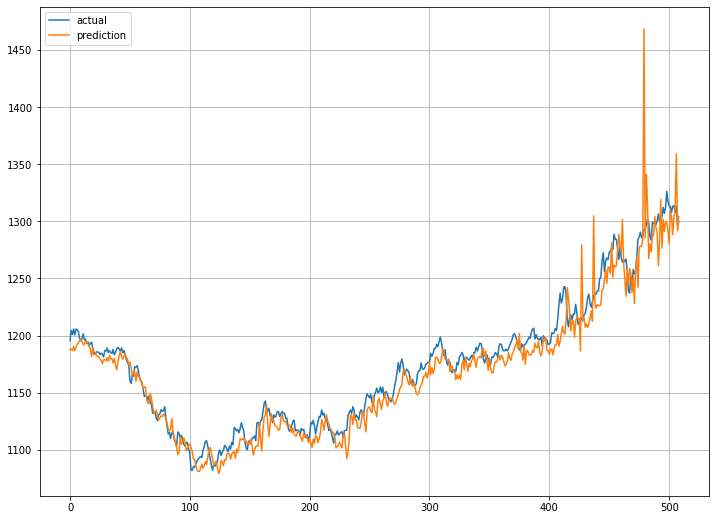

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend()